In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [3]:
# ===== 1. Membaca dan Menyiapkan Data =====
data = pd.read_csv("/content/flu.csv")
data = data.copy()

# Drop kolom dengan banyak missing values (> 40%)
data = data.loc[:, data.isnull().sum() < 0.4 * len(data)]

# Hapus baris yang memiliki missing value
data.dropna(inplace=True)

# Encode target menjadi biner: 1 jika H1N1, 0 jika bukan
data['target'] = data['Diagnosis'].apply(lambda x: 1 if x == 'H1N1' else 0)
data.drop(columns=['Diagnosis', 'InitialPCRDiagnosis'], inplace=True, errors='ignore')

# Encode fitur kategorikal
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Pisahkan fitur dan target
X = data.drop(columns='target')
y = data['target']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<ipython-input-3-e559db4d52f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-3-e559db4d52f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['Diagnosis'].apply(lambda x: 1 if x == 'H1N1' else 0)
<ipython-input-3-e559db4d52f0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Diagnosis', 'Initi

In [4]:
# ===== 2. Model Training =====
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

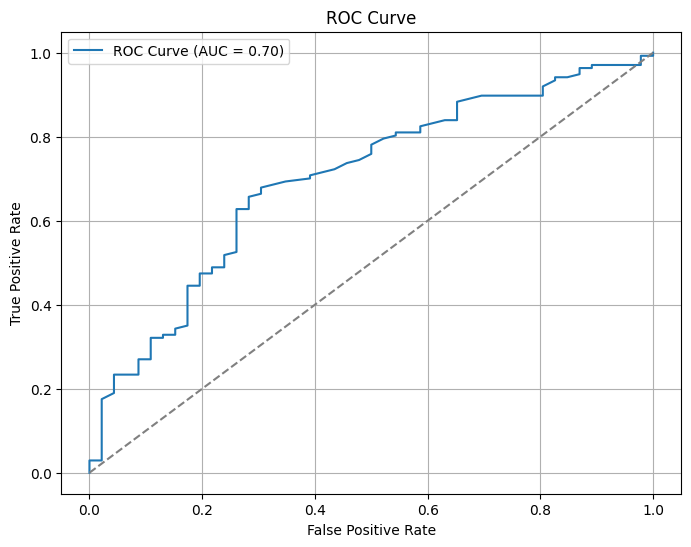


=== Evaluation Metrics ===
Accuracy : 0.7377
Precision: 0.7730
Recall   : 0.9197
F1-Score : 0.8400
AUC      : 0.7004


In [5]:
# ===== 3. Evaluasi Model =====
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Tampilkan hasil evaluasi
print("\n=== Evaluation Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

## ✅ Kesimpulan Evaluasi Model - Deteksi H1N1

Model **Logistic Regression** telah dilatih untuk memprediksi kemungkinan infeksi flu **H1N1** berdasarkan data gejala dan hasil laboratorium. Berikut adalah hasil evaluasinya:

| **Metrik Evaluasi** | **Nilai** | **Interpretasi** |
|---------------------|-----------|------------------|
| **Accuracy**        | 73.8%     | Model memprediksi dengan benar sekitar 3 dari 4 kasus. |
| **Precision**       | 77.3%     | Dari seluruh prediksi positif H1N1, sekitar 77.3% benar. |
| **Recall**          | 91.97%    | Model mendeteksi hampir semua kasus H1N1. Ini sangat penting dalam konteks kesehatan. |
| **F1-Score**        | 84.0%     | Keseimbangan yang baik antara precision dan recall. |
| **AUC (ROC)**       | 70.0%     | Kemampuan model membedakan antara H1N1 dan bukan. Cukup baik. |

### 📌 Rangkuman:
- ✅ **Recall sangat tinggi (91.97%)**, artinya model sangat efektif dalam menangkap kasus H1N1 — sangat penting untuk pencegahan penyebaran.
- ✅ **Precision cukup baik (77.3%)**, prediksi positif sebagian besar benar.
- ✅ **F1 dan AUC seimbang**, menandakan model cukup andal dan stabil.

> Model ini cocok digunakan sebagai **sistem skrining awal** untuk deteksi H1N1 dan dapat dikembangkan lebih lanjut untuk meningkatkan akurasi secara keseluruhan.
